# 2. Conexão e Análise dos Dados

In [2]:
# Importando os pacotes

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import MinMaxScaler, RobustScaler
from sklearn.preprocessing import LabelEncoder

In [3]:
# Pegando as colunas

col_names = pd.read_csv('dados_filtrados.csv', nrows=0, sep=';').columns

In [4]:
col_names 

Index(['CONTADOR', 'ORIGEM', 'TIPOBITO', 'DTOBITO', 'HORAOBITO', 'NATURAL0',
       'DTNASC', 'IDADE', 'SEXO', 'RACACOR', 'ESTCIV', 'ESC', 'OCUP',
       'CODMUNRES', 'LOCOCOR', 'CODESTAB', 'CODMUNOCOR', 'IDADEMAE', 'ESCMAE',
       'SERIESCMAE', 'OCUPMAE', 'QTDFILVIVO', 'QTDFILMORT', 'GRAVIDEZ',
       'SEMAGESTAC', 'GESTACAO', 'PARTO', 'OBITOPARTO', 'PESO', 'TPMORTEOCO',
       'OBITOGRAV', 'OBITOPUERP', 'ASSISTMED', 'EXAME', 'CIRURGIA',
       'NECROPSIA', 'LINHAA', 'LINHAB', 'LINHAC', 'LINHAD', 'LINHAII',
       'CAUSABAS', 'COMUNSVOIM', 'DTATESTADO', 'CIRCOBITO', 'ACIDTRAB',
       'FONTE', 'TPPOS', 'DTINVESTIG', 'CAUSABAS_O', 'DTCADASTRO', 'ATESTANTE',
       'FONTEINV', 'DTRECEBIM', 'CAUSAMAT', 'ESC2010', 'ESCMAE2010', 'DIFDATA',
       'STDOEPIDEM', 'STDONOVA', 'DTCADINV', 'TPOBITOCOR', 'DTCONINV',
       'DTCADINF', 'MORTEPARTO', 'DTCONCASO', 'NUDIASOBIN', 'ANO'],
      dtype='object')

In [5]:
colunms_str = ['DTOBITO', 'HORAOBITO', 'DTNASC','LINHAA', 'LINHAB', 'LINHAC', 'LINHAD', 'LINHAII',
       'CAUSABAS', 'DTATESTADO', 'DTINVESTIG', 'CAUSABAS_O', 'DTCADASTRO', 'DTRECEBIM',  'DIFDATA',
       'STDOEPIDEM', 'STDONOVA', 'DTCADINV', 'TPOBITOCOR', 'DTCONINV',
       'DTCADINF', 'DTCONCASO']

In [6]:
coluns_int = ['CONTADOR', 'ORIGEM', 'TIPOBITO', 'NATURAL0','IDADE', 'SEXO', 'RACACOR', 'ESTCIV', 'ESC', 'OCUP',
             'CODMUNRES', 'LOCOCOR', 'CODESTAB', 'CODMUNOCOR', 'IDADEMAE', 'ESCMAE',
               'SERIESCMAE', 'OCUPMAE', 'QTDFILVIVO', 'QTDFILMORT', 'GRAVIDEZ',
               'SEMAGESTAC', 'GESTACAO', 'PARTO', 'OBITOPARTO', 'PESO', 'TPMORTEOCO',
               'OBITOGRAV', 'OBITOPUERP', 'ASSISTMED', 'EXAME', 'CIRURGIA',
               'NECROPSIA','COMUNSVOIM', 'CIRCOBITO', 'ACIDTRAB','FONTE','TPPOS','ATESTANTE',
               'FONTEINV', 'CAUSAMAT', 'ESC2010', 'ESCMAE2010', 'MORTEPARTO','NUDIASOBIN', 'ANO']

In [7]:
# Importando o dataFrame - todos como str

df = pd.read_csv('dados_filtrados.csv', sep=';', dtype=str)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211593 entries, 0 to 211592
Data columns (total 68 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   CONTADOR    211593 non-null  object
 1   ORIGEM      211593 non-null  object
 2   TIPOBITO    211593 non-null  object
 3   DTOBITO     211593 non-null  object
 4   HORAOBITO   208415 non-null  object
 5   NATURAL0    174587 non-null  object
 6   DTNASC      211484 non-null  object
 7   IDADE       211593 non-null  object
 8   SEXO        211593 non-null  object
 9   RACACOR     205564 non-null  object
 10  ESTCIV      206211 non-null  object
 11  ESC         200701 non-null  object
 12  OCUP        187751 non-null  object
 13  CODMUNRES   211593 non-null  object
 14  LOCOCOR     211593 non-null  object
 15  CODESTAB    132717 non-null  object
 16  CODMUNOCOR  211593 non-null  object
 17  IDADEMAE    0 non-null       object
 18  ESCMAE      0 non-null       object
 19  SERIESCMAE  0 non-null 

In [9]:
df.isnull().values.any()

True

In [10]:
# Calculando o percentual dos dados que estão em branco

percentual_nulos = (df.isnull().sum() / len(df)) * 100
percentual_nulos[percentual_nulos > 0].sort_values(ascending=False)

PESO          100.000000
OCUPMAE       100.000000
CAUSAMAT      100.000000
OBITOPARTO    100.000000
PARTO         100.000000
GESTACAO      100.000000
SEMAGESTAC    100.000000
GRAVIDEZ      100.000000
QTDFILMORT    100.000000
QTDFILVIVO    100.000000
SERIESCMAE    100.000000
ESCMAE        100.000000
IDADEMAE      100.000000
ACIDTRAB      100.000000
DTCADINF      100.000000
MORTEPARTO    100.000000
DTCONCASO     100.000000
ESCMAE2010    100.000000
DTCADINV       99.999055
TPOBITOCOR     99.999055
DTCONINV       99.999055
NUDIASOBIN     99.998582
FONTE          99.983931
CIRCOBITO      99.982986
TPMORTEOCO     99.779766
OBITOPUERP     99.776930
OBITOGRAV      99.776458
CIRURGIA       99.180030
EXAME          99.167269
COMUNSVOIM     93.338627
DTINVESTIG     87.268955
FONTEINV       86.826124
LINHAD         77.300289
LINHAC         50.567363
LINHAII        45.238264
CODESTAB       37.277226
TPPOS          34.498778
ASSISTMED      28.642252
NECROPSIA      28.428162
LINHAB         21.025270


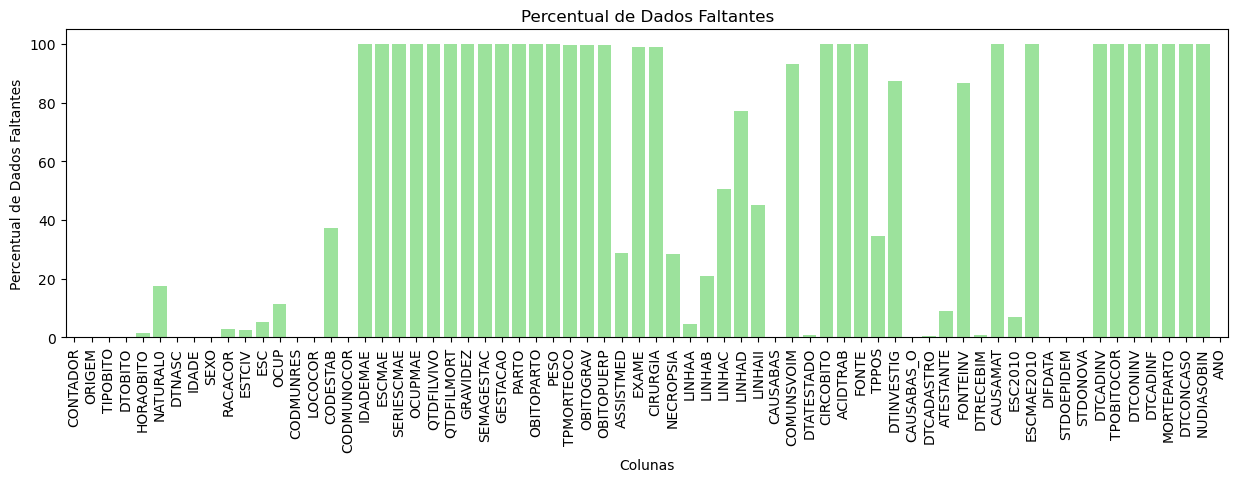

In [11]:
plt.figure(figsize=(15, 4))
sns.barplot(x=percentual_nulos.index, y=percentual_nulos.values, color='lightgreen')
plt.title('Percentual de Dados Faltantes')
plt.xlabel('Colunas')
plt.ylabel('Percentual de Dados Faltantes')
plt.xticks(rotation=90) # deixa os labels em pé, melhor p ver

plt.show()

## Dicionário dos dados

| Coluna         | Descrição                                                                                                         | Ação                       | Tipo  | % Dados Faltantes |
|----------------|-------------------------------------------------------------------------------------------------------------------|----------------------------|-------|-------------------|
| Contador       | ID ordenado dos registros na tabela                                                                              | Descartar                  | -     | -                 |
| Origem         | Banco de dados de Origem da Informação                                                                           | Descartar                  | -     | -                 |
| TIPOBITO       | Óbito Fetal - Morte antes do nascimento                                                                          | Descartar                  | -     | -                 |
| DtObito        | Data em que ocorreu o óbito                                                                                      | Descartar                  | -     | -                 |
| HORAOBITO      | Hora do óbito                                                                                                    | Descartar                  | -     | -                 |
| Natural0       | País e Unidade de Federação onde o falecido nasceu                                                               | Manter                     | Int   | 17%               |
| DTNASC         | Data de Nascimento                                                                                               | Descartar                  | -     | -                 |
| Idade          | Idade do Falecido codificada                                                                                     | Manter                     | Int   | -                 |
| Sexo           | Sexo do Falecido                                                                                                 | Manter                     | Int   | -                 |
| RacaCor        | Cor informada pelo responsável pelas informações                                                                 | Manter                     | Int   | 2%                |
| EstCiv         | Estado Civil do falecido                                                                                         | Manter                     | Int   | 2%                |
| Esc            | Escolaridade em anos                                                                                             | Manter                     | Int   | 5%                |
| OCUP           | Tipo de trabalho predominante na vida do falecido                                                                | Manter                     | Int   | 11%               |
| CodMunRes      | Código do município de residência                                                                                | Manter                     | Int   | -                 |
| LOCOCOR        | Local de ocorrência do óbito                                                                                     | Manter                     | Int   | -                 |
| CODESTAB       | Código do Estabelecimento                                                                                        | Descartar                  | -     | -                 |
| CODMUNOCOR     | Código do município onde ocorreu o óbito                                                                         | Manter                     | Int   | -                 |
| IdadeMae       | Idade da mãe                                                                                                     | Descartar                  | -     | 100%              |
| ESCMAE         | Escolaridade da mãe                                                                                              | Descartar                  | -     | 100%              |
| SERIESCMAE     | Última série escolar concluída pela mãe                                                                          | Descartar                  | -     | 100%              |
| OCUPMAE        | Trabalho da mãe                                                                                                  | Descartar                  | -     | 100%              |
| QTDFILVIVO     | Número de filhos vivos                                                                                           | Descartar                  | -     | 100%              |
| QTDFILMORT     | Número de filhos mortos                                                                                          | Descartar                  | -     | 100%              |
| GRAVIDEZ       | Óbito na gravidez                                                                                                | Descartar                  | -     | 100%              |
| SEMAGESTAC     | Semanas de gestação                                                                                              | Descartar                  | -     | 100%              |
| GESTACAO       | Faixas de semanas de gestação                                                                                    | Descartar                  | -     | 100%              |
| PARTO          | Tipo de parto                                                                                                    | Descartar                  | -     | 100%              |
| OBITOPARTO     | Óbito no parto                                                                                                   | Descartar                  | -     | 100%              |
| PESO           | Peso ao nascer                                                                                                   | Descartar                  | -     | 100%              |
| TPMORTEOCO     | Situação gestacional/pósgestacional do óbito                                                                    | Descartar                  | -     | 99%               |
| OBITOGRAV      | Óbito na gravidez                                                                                                | Descartar                  | -     | 99%               |
| OBITOPUERP     | Óbito no puerpério                                                                                               | Descartar                  | -     | 99%               |
| ASSISTMED      | Atendimento médico durante a enfermidade                                                                         | Manter                     | Int   | 28%               |
| EXAME          | Realização de exame                                                                                              | Descartar                  | -     | 99%               |
| CIRURGIA       | Realização de cirurgia                                                                                           | Descartar                  | -     | 99%               |
| NECROPSIA      | Execução ou não de necropsia                                                                                     | Manter                     | Int   | 28%               |
| LINHAA         | Causa terminal                                                                                                   | Manter                     | Str   | -                 |
| LINHAB         | Causa antecedente                                                                                                | Manter                     | Str   | -                 |
| LINHAC         | Causa antecedente                                                                                                | Manter                     | Str   | -                 |
| LINHAD         | Causa básica                                                                                                     | Manter                     | Str   | -                 |
| LINHAII        | Causa contribuinte                                                                                               | Manter                     | Str   | -                 |
| CAUSABAS       | Causa básica                                                                                                     | Manter                     | Str   | -                 |
| COMUNSVOIM     | Código do município do SVO ou IML                                                                                | Descartar                  | -     | 92%               |
| DTATESTADO     | Data do atestado                                                                                                 | Descartar                  | -     | -                 |
| CIRCOBITO      | Tipo de morte violenta                                                                                           | Descartar                  | -     | 99%               |
| ACIDTRAB       | Óbito relacionado ao trabalho                                                                                    | Descartar                  | -     | 99%               |
| FONTE          | Fonte da informação                                                                                              | Descartar                  | -     | -                 |
| TPPOS          | Óbito investigado                                                                                                | Descartar                  | -     | 100%              |
| DTINVESTIG     | Data da investigação                                                                                             | Descartar                  | -     | -                 |
| CAUSABAS_O     | Causa básica informada antes da resseleção                                                                       | Manter                     | Str   | -                 |
| DTCADASTRO     | Data do cadastro                                                                                                 | Descartar                  | -     | -                 |
| ATESTANTE      | Médico atendeu o paciente?                                                                                       | Manter                     | Int   | 10%               |
| FONTEINV       | Fonte da investigação                                                                                            | Descartar                  | -     | 86%               |
| DTRECEBIM      | Data de recebimento                                                                                              | Descartar                  | -     | -                 |
| CAUSAMAT       | CID causa materna                                                                                                | Descartar                  | -     | 100%              |
| ESC2010        | Escolaridade última série concluída (falecido)                                                                   | Manter                     | Int   | 7%                |
| ESCMAE2010     | Escolaridade última série concluída (mãe)                                                                        | Descartar                  | -     | 100%              |
| DIFDATA        | Diferença entre datas                                                                                            | Descartar                  | -     | -                 |
| STDOEPIDEM     | Status DO Epidemiológica                                                                                         | Descartar                  | Int   | -                 |
| STDONOVA       | Status DO Nova                                                                                                   | Descartar                  | Int   | -                 |
| DTCADINV       | Data do cadastro de investigação                                                                                 | Manter                     | Str   | -                 |
| TPOBITOCOR     | Momento da ocorrência do óbito                                                                                   | Descartar                  | Int   | -                 |
| DTCONINV       | Data da conclusão da investigação                                                                                | Manter                     | Str   | -                 |
| DTCADINF       | Indica se houve investigação                                                                                     | Manter                     | Str   | -                 |
| MORTEPARTO     | Falta descrição na fonte                                                                                         | Descartar                  | -     | -                 |
| DTCONCASO      | Data da conclusão do caso                                                                                        | Descartar                  | Str   | -                 |
| NUDIASOBIN     | Dias entre óbito e conclusão da investigação                                                                     | Descartar                  | -     | 99%               |
| ANO            | Ano que a morte ocorreu                                                                                          | Manter                     | Str   | -                 |


In [14]:
# Ocupação

df_ocup = pd.read_csv('Ocupacao(Planilha1).csv', encoding="UTF-8", delimiter=',')

In [15]:
df_ocup.head()

,Profissao,Codigo
0,Oficial General da Aeronáutica,10105
1,Oficial General do Exército,10110
2,Oficial General da Marinha,10115
3,Oficial da Aeronáutica,10205
4,Oficial do Exército,10210


In [16]:
df_ocup.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2429 entries, 0 to 2428
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Profissao  2429 non-null   object
 1   Codigo     2429 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 38.1+ KB


# 3. Processamento de Dados

### 1. Alterando o dtype dos dados

In [19]:
for cols in col_names:
    if cols not in colunms_str:
        df[cols] = pd.to_numeric(df[cols], errors='coerce').astype('Int64')

### 2. Descartar colunas irrelevantes / que não serão utilizadas para esta pesquisa

In [21]:
df.drop(['CONTADOR', 'ORIGEM', 'TIPOBITO', 'DTOBITO', 'HORAOBITO', 'DTNASC', 'CODESTAB', 'IDADEMAE', 'ESCMAE', 'SERIESCMAE', 'OCUPMAE', 'QTDFILVIVO',
        'QTDFILMORT', 'GRAVIDEZ', 'SEMAGESTAC', 'GESTACAO', 'PARTO', 'OBITOPARTO', 'PESO', 'TPMORTEOCO', 'OBITOGRAV', 'OBITOPUERP', 'EXAME', 'CIRURGIA',
        'COMUNSVOIM', 'DTATESTADO', 'CIRCOBITO', 'ACIDTRAB', 'FONTE', 'TPPOS', 'DTINVESTIG', 'DTCADASTRO', 'FONTEINV', 'DTRECEBIM', 'CAUSAMAT', 'ESCMAE2010',
        'DIFDATA', 'STDOEPIDEM', 'STDONOVA', 'DTCADINV', 'TPOBITOCOR', 'DTCONINV', 'DTCADINF', 'MORTEPARTO', 'DTCONCASO', 'NUDIASOBIN'], axis=1, inplace=True)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211593 entries, 0 to 211592
Data columns (total 22 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   NATURAL0    174587 non-null  Int64 
 1   IDADE       211593 non-null  Int64 
 2   SEXO        211593 non-null  Int64 
 3   RACACOR     205564 non-null  Int64 
 4   ESTCIV      206211 non-null  Int64 
 5   ESC         200701 non-null  Int64 
 6   OCUP        187751 non-null  Int64 
 7   CODMUNRES   211593 non-null  Int64 
 8   LOCOCOR     211593 non-null  Int64 
 9   CODMUNOCOR  211593 non-null  Int64 
 10  ASSISTMED   150988 non-null  Int64 
 11  NECROPSIA   151441 non-null  Int64 
 12  LINHAA      201645 non-null  object
 13  LINHAB      167105 non-null  object
 14  LINHAC      104596 non-null  object
 15  LINHAD      48031 non-null   object
 16  LINHAII     115872 non-null  object
 17  CAUSABAS    211593 non-null  object
 18  CAUSABAS_O  211459 non-null  object
 19  ATESTANTE   192230 non-

### 3. Tratamento de Dados Faltantes

In [24]:
percentual_nulos = (df.isnull().sum() / len(df)) * 100
percentual_nulos[percentual_nulos > 0].sort_values(ascending=False)

LINHAD        77.300289
LINHAC        50.567363
LINHAII       45.238264
ASSISTMED     28.642252
NECROPSIA     28.428162
LINHAB        21.025270
NATURAL0      17.489236
OCUP          11.267859
ATESTANTE      9.151059
ESC2010        7.075376
ESC            5.147618
LINHAA         4.701479
RACACOR        2.849338
ESTCIV         2.543562
CAUSABAS_O     0.063329
dtype: float64

#### Inserindo valores representativos

In [26]:
# Preencher com 9 -> Não Informado - Já existente no dicionário de dados do DATASUS

df[['ASSISTMED', 'NECROPSIA', 'ESC2010', 'ESC', 'ESTCIV']] = df[['ASSISTMED', 'NECROPSIA', 'ESC2010', 'ESC', 'ESTCIV']].fillna(9)

In [27]:
# Preencher com 0 -> Não se aplica

df[['LINHAD', 'LINHAII', 'LINHAC', 'LINHAB', 'LINHAA', 'CAUSABAS_O']] = df[['LINHAD', 'LINHAII', 'LINHAC', 'LINHAB', 'LINHAA', 'CAUSABAS_O']].fillna(0)

In [28]:
percentual_nulos = (df.isnull().sum() / len(df)) * 100
percentual_nulos[percentual_nulos > 0].sort_values(ascending=False)

NATURAL0     17.489236
OCUP         11.267859
ATESTANTE     9.151059
RACACOR       2.849338
dtype: float64

In [29]:
# Preenchendo como 0 -> Não informado
df[['NATURAL0', 'OCUP', 'ATESTANTE', 'RACACOR']] = df[['NATURAL0', 'OCUP', 'ATESTANTE', 'RACACOR']].fillna(0)

<Axes: >

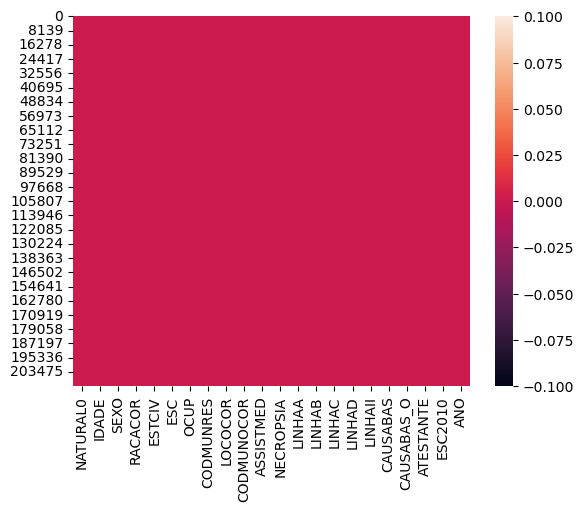

In [30]:
sns.heatmap(df.isnull())

In [31]:
df.head() 

,NATURAL0,IDADE,SEXO,RACACOR,ESTCIV,ESC,OCUP,CODMUNRES,LOCOCOR,CODMUNOCOR,...,LINHAA,LINHAB,LINHAC,LINHAD,LINHAII,CAUSABAS,CAUSABAS_O,ATESTANTE,ESC2010,ANO
0,0,497,2,4,3,1,999993,290840,3,290840,...,*G300,*R54X,0,0,0,G300,G300,5,0,2012
1,0,467,1,1,4,2,999993,290840,3,290840,...,*G300,0,0,0,*I64X,G300,G300,5,1,2012
2,0,473,1,1,2,3,621005,230240,3,230240,...,*J969,*E46X,*G300,0,0,G300,G300,1,1,2012
3,0,483,1,1,2,1,0,210230,3,210230,...,*G300,0,0,0,0,G300,G300,0,0,2012
4,0,492,2,1,3,0,0,210150,3,210150,...,*G300,0,0,0,0,G300,G300,5,9,2012


### 4. Tratamento das colunas de CID

Devido a algumas linhas da coluna CID conterem mais de um valor, será necessário realizar um tratamento nessas linhas. Para isso, utilizaremos o método de split com base no caractere *. Após essa divisão, cada letra presente no CID será codificado, transformando-o no tipo int. Esse procedimento visa facilitar a aplicação de algoritmos posteriormente, garantindo que os dados estejam em um formato adequado para análise.

In [34]:
# Verifica a quantidade de * presente nas linhas

max_splits_A = df['LINHAA'].str.count(r'\*').max()
max_splits_B = df['LINHAB'].str.count(r'\*').max()
max_splits_C = df['LINHAC'].str.count(r'\*').max()
max_splits_D = df['LINHAD'].str.count(r'\*').max()
max_splits_II = df['LINHAII'].str.count(r'\*').max()


print(max_splits_A, max_splits_B, max_splits_C, max_splits_D, max_splits_II)

4.0 4.0 4.0 4.0 9.0


In [35]:
# Separar os CID's, criando novas colunas

# Lista das colunas de CID para realizar a separação
df_linhas = ['LINHAA', 'LINHAB', 'LINHAC', 'LINHAD', 'LINHAII']

# Vetor auxiliar
df_splited = []

# Percorre as linhas do df realizando o split, renomeando as colunas e preenchendo como 0 colunas sem informações
for linhas in df_linhas:
    try:
        # Separa os CID's em colunas
        df_split = df[linhas].str.split('*', expand=True)
        
        # realiza o split no primeiro *, fazendo com que a primeira coluna seja nula, sendo necessário dropar
        df_split = df_split.drop(0, axis=1)
        
        # renomeia as colunas criadas para linha_i com base na quantidade de colunas
        df_split.columns = [f'{linhas}_{i+1}' for i in range(df_split.shape[1])]
        
        # linhas que ficaram sem valor recebem 0
        df_split = df_split.replace('', 0).fillna(0)
        
        # adiciona esse novo "df" na lista aux para realizar o outro loop com a prox linha
        df_splited.append(df_split)
        
    except:
        pass

In [36]:
df_splited

[       LINHAA_1 LINHAA_2 LINHAA_3 LINHAA_4
 0          G300        0        0        0
 1          G300        0        0        0
 2          J969        0        0        0
 3          G300        0        0        0
 4          G300        0        0        0
 ...         ...      ...      ...      ...
 211588        0        0        0        0
 211589     G309        0        0        0
 211590     R54X        0        0        0
 211591        0        0        0        0
 211592     A403        0        0        0
 
 [211593 rows x 4 columns],
        LINHAB_1 LINHAB_2 LINHAB_3 LINHAB_4
 0          R54X        0        0        0
 1             0        0        0        0
 2          E46X        0        0        0
 3             0        0        0        0
 4             0        0        0        0
 ...         ...      ...      ...      ...
 211588     I509        0        0        0
 211589        0        0        0        0
 211590        0        0        0        0
 2

In [37]:
# Transformando o CID's em colunas numéricas:

def substituir_letras(cid):
    # Verifica se é string
    if isinstance(cid, str):
        aux = ""
        
        for digito in cid:
            # verifica se é letra (a - z)
            if digito.isalpha():
                # ord -> converte caracteres em inteiros
                numero = ord(digito.upper()) - ord('A') + 1
                # concatena à string auxiliar criada
                aux += str(numero)

            # se for numero, continua
            else:
                aux += digito     
        return aux
    return cid

##### DICIONARIO COM A CODIFICAÇÃO POR LETRA:
| Letra | Número |
|-------|--------|
| A     | 1      |
| B     | 2      |
| C     | 3      |
| D     | 4      |
| E     | 5      |
| F     | 6      |
| G     | 7      |
| H     | 8      |
| I     | 9      |
| J     | 10     |
| K     | 11     |
| L     | 12     |
| M     | 13     |
| N     | 14     |
| O     | 15     |
| P     | 16     |
| Q     | 17     |
| R     | 18     |
| S     | 19     |
| T     | 20     |
| U     | 21     |
| V     | 22     |
| W     | 23     |
| X     | 24     |
| Y     | 25     |
| Z     | 26     |


In [39]:
# Linhas que passarão pelo tratamento da transformação:
df_linhas = ['LINHAA_1','LINHAA_2','LINHAA_3','LINHAA_4','LINHAB_1','LINHAB_2','LINHAB_3','LINHAB_4','LINHAC_1','LINHAC_2','LINHAC_3',
             'LINHAC_4','LINHAD_1','LINHAD_2','LINHAD_3','LINHAD_4','LINHAII_1', 'LINHAII_2', 'LINHAII_3', 'LINHAII_4', 'LINHAII_5', 'LINHAII_6',
            'LINHAII_7', 'LINHAII_8', 'LINHAII_9']

# Percorre os DataFrames pertencentes a lista de df_splited
for i in range(len(df_splited)):
    for coluna in df_linhas:
        if coluna in df_splited[i].columns:
            df_splited[i][coluna] = df_splited[i][coluna].apply(substituir_letras)

In [40]:
print(df_splited[3].loc[:3238, 'LINHAD_2'])

0                  0
1                  0
2                  0
3                  0
4                  0
            ...     
3234               0
3235               0
3236               0
3237      1289  7309
3238               0
Name: LINHAD_2, Length: 3239, dtype: object


In [41]:
df_splited[3] = df_splited[3].drop(3237)

In [42]:
# Transformar o tipo de dado para inteiro
for i in range(len(df_splited)):
    # preencher na com 0
    df_splited[i] = df_splited[i].fillna(0)

    # garantir a transformação para números
    df_splited[i] = df_splited[i].apply(pd.to_numeric, errors='coerce')

    # transformar para inteiro
    df_splited[i] = df_splited[i].astype('Int64')

In [43]:
# transforma a lista com as novas colunas em uma serie para realizar a concatenação com o df original:
df_splited_final = pd.concat(df_splited, axis=1)

In [44]:
df_splited_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211593 entries, 0 to 211592
Data columns (total 25 columns):
 #   Column     Non-Null Count   Dtype
---  ------     --------------   -----
 0   LINHAA_1   211593 non-null  Int64
 1   LINHAA_2   211593 non-null  Int64
 2   LINHAA_3   211593 non-null  Int64
 3   LINHAA_4   211593 non-null  Int64
 4   LINHAB_1   211593 non-null  Int64
 5   LINHAB_2   211593 non-null  Int64
 6   LINHAB_3   211593 non-null  Int64
 7   LINHAB_4   211593 non-null  Int64
 8   LINHAC_1   211593 non-null  Int64
 9   LINHAC_2   211593 non-null  Int64
 10  LINHAC_3   211593 non-null  Int64
 11  LINHAC_4   211593 non-null  Int64
 12  LINHAD_1   211592 non-null  Int64
 13  LINHAD_2   211592 non-null  Int64
 14  LINHAD_3   211592 non-null  Int64
 15  LINHAD_4   211592 non-null  Int64
 16  LINHAII_1  211593 non-null  Int64
 17  LINHAII_2  211593 non-null  Int64
 18  LINHAII_3  211593 non-null  Int64
 19  LINHAII_4  211593 non-null  Int64
 20  LINHAII_5  211593 non-null

In [45]:
# concatena o df original com o df com as linhas de CID's separadas
df = pd.concat([df, df_splited_final], axis=1)

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211593 entries, 0 to 211592
Data columns (total 47 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   NATURAL0    211593 non-null  Int64 
 1   IDADE       211593 non-null  Int64 
 2   SEXO        211593 non-null  Int64 
 3   RACACOR     211593 non-null  Int64 
 4   ESTCIV      211593 non-null  Int64 
 5   ESC         211593 non-null  Int64 
 6   OCUP        211593 non-null  Int64 
 7   CODMUNRES   211593 non-null  Int64 
 8   LOCOCOR     211593 non-null  Int64 
 9   CODMUNOCOR  211593 non-null  Int64 
 10  ASSISTMED   211593 non-null  Int64 
 11  NECROPSIA   211593 non-null  Int64 
 12  LINHAA      211593 non-null  object
 13  LINHAB      211593 non-null  object
 14  LINHAC      211593 non-null  object
 15  LINHAD      211593 non-null  object
 16  LINHAII     211593 non-null  object
 17  CAUSABAS    211593 non-null  object
 18  CAUSABAS_O  211593 non-null  object
 19  ATESTANTE   211593 non-

In [47]:
# Transformando CAUSABAS e CAUSABAS_O

df['CAUSABAS'] = df['CAUSABAS'].apply(substituir_letras)
df['CAUSABAS_O'] = df['CAUSABAS_O'].apply(substituir_letras)

In [48]:
# Transformar para inteiro

causas = ['CAUSABAS', 'CAUSABAS_O']

for x in causas:
    # preencher na com 0
    df[x] = df[x].fillna(0)

    df[x] = df[x].apply(pd.to_numeric, errors='coerce')

    df[x] = df[x].astype('Int64')

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211593 entries, 0 to 211592
Data columns (total 47 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   NATURAL0    211593 non-null  Int64 
 1   IDADE       211593 non-null  Int64 
 2   SEXO        211593 non-null  Int64 
 3   RACACOR     211593 non-null  Int64 
 4   ESTCIV      211593 non-null  Int64 
 5   ESC         211593 non-null  Int64 
 6   OCUP        211593 non-null  Int64 
 7   CODMUNRES   211593 non-null  Int64 
 8   LOCOCOR     211593 non-null  Int64 
 9   CODMUNOCOR  211593 non-null  Int64 
 10  ASSISTMED   211593 non-null  Int64 
 11  NECROPSIA   211593 non-null  Int64 
 12  LINHAA      211593 non-null  object
 13  LINHAB      211593 non-null  object
 14  LINHAC      211593 non-null  object
 15  LINHAD      211593 non-null  object
 16  LINHAII     211593 non-null  object
 17  CAUSABAS    211593 non-null  Int64 
 18  CAUSABAS_O  211593 non-null  Int64 
 19  ATESTANTE   211593 non-

In [50]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
NATURAL0,211593.0,670.492162,326.345076,0.0,823.0,831.0,835.0,999.0
IDADE,211593.0,484.635442,8.675258,460.0,480.0,485.0,490.0,999.0
SEXO,211593.0,1.648377,0.477686,0.0,1.0,2.0,2.0,2.0
RACACOR,211593.0,1.634676,1.230144,0.0,1.0,1.0,2.0,9.0
ESTCIV,211593.0,2.937172,1.717529,1.0,2.0,3.0,3.0,9.0
ESC,211593.0,3.590596,2.693781,0.0,2.0,3.0,4.0,9.0
OCUP,211593.0,753991.421219,361116.033687,0.0,612005.0,999992.0,999993.0,999994.0
CODMUNRES,211593.0,345837.115514,78228.603148,110001.0,310690.0,351020.0,410690.0,530010.0
LOCOCOR,211593.0,1.889949,1.130931,1.0,1.0,1.0,3.0,9.0
CODMUNOCOR,211593.0,345888.718516,78259.149256,110001.0,310670.0,351060.0,410690.0,530010.0


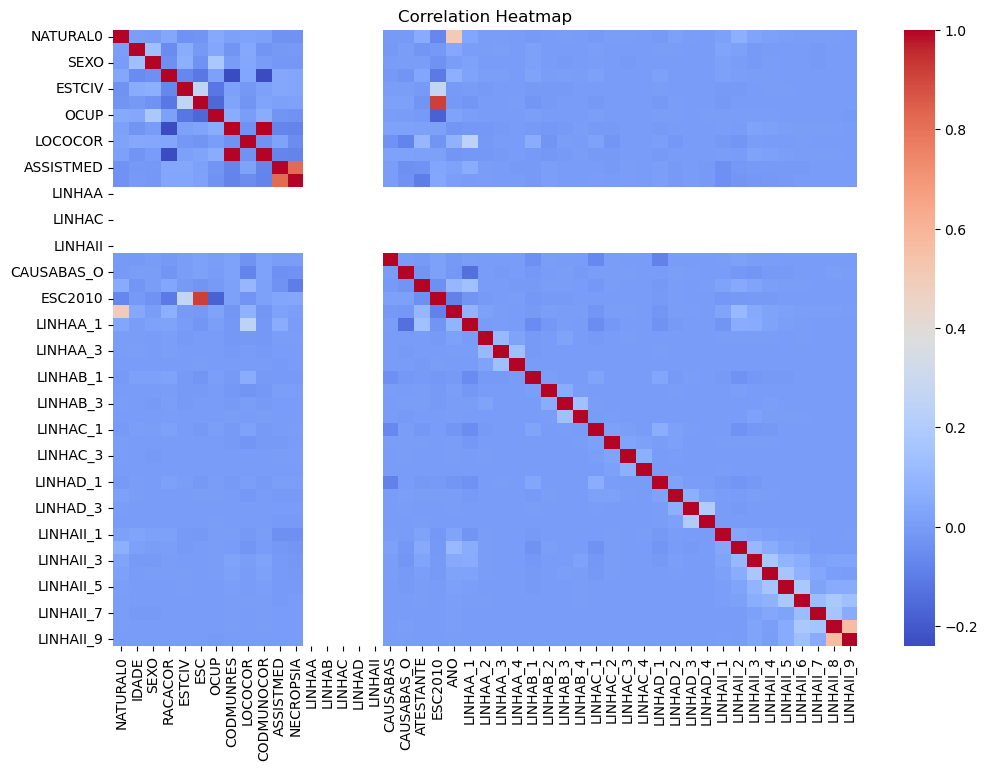

In [51]:
df_cleaned = df.apply(pd.to_numeric, errors='coerce')

correlation_matrix = df_cleaned.corr()

plt.figure(figsize=(12,8))
sns.heatmap(correlation_matrix, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

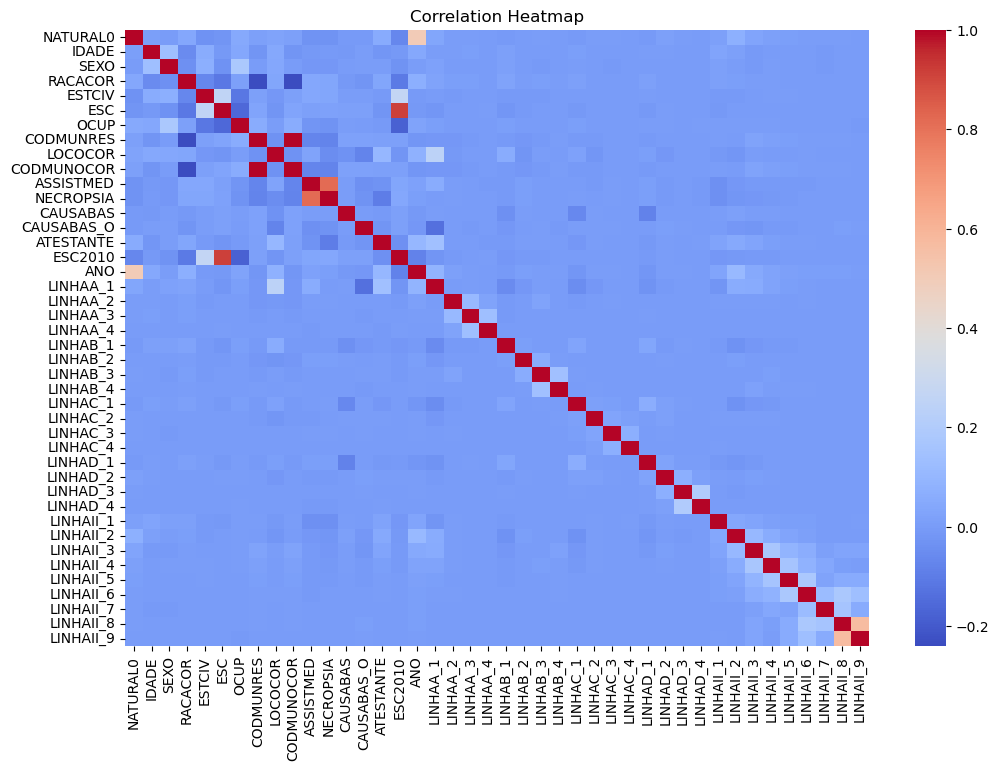

In [52]:
target_columns = df.drop(columns=['LINHAA', 'LINHAB', 'LINHAC', 'LINHAD', 'LINHAII'])
numeric_columns = target_columns.select_dtypes(include=['number']).columns

# Compute and plot the heatmap for numeric columns
plt.figure(figsize=(12,8))
sns.heatmap(df[numeric_columns].corr(), cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

In [53]:
threshold = 0.4
df = df.loc[:, df.isnull().mean() < threshold]
df.head()

,NATURAL0,IDADE,SEXO,RACACOR,ESTCIV,ESC,OCUP,CODMUNRES,LOCOCOR,CODMUNOCOR,...,LINHAD_4,LINHAII_1,LINHAII_2,LINHAII_3,LINHAII_4,LINHAII_5,LINHAII_6,LINHAII_7,LINHAII_8,LINHAII_9
0,0,497,2,4,3,1,999993,290840,3,290840,...,0,0,0,0,0,0,0,0,0,0
1,0,467,1,1,4,2,999993,290840,3,290840,...,0,96424,0,0,0,0,0,0,0,0
2,0,473,1,1,2,3,621005,230240,3,230240,...,0,0,0,0,0,0,0,0,0,0
3,0,483,1,1,2,1,0,210230,3,210230,...,0,0,0,0,0,0,0,0,0,0
4,0,492,2,1,3,0,0,210150,3,210150,...,0,0,0,0,0,0,0,0,0,0


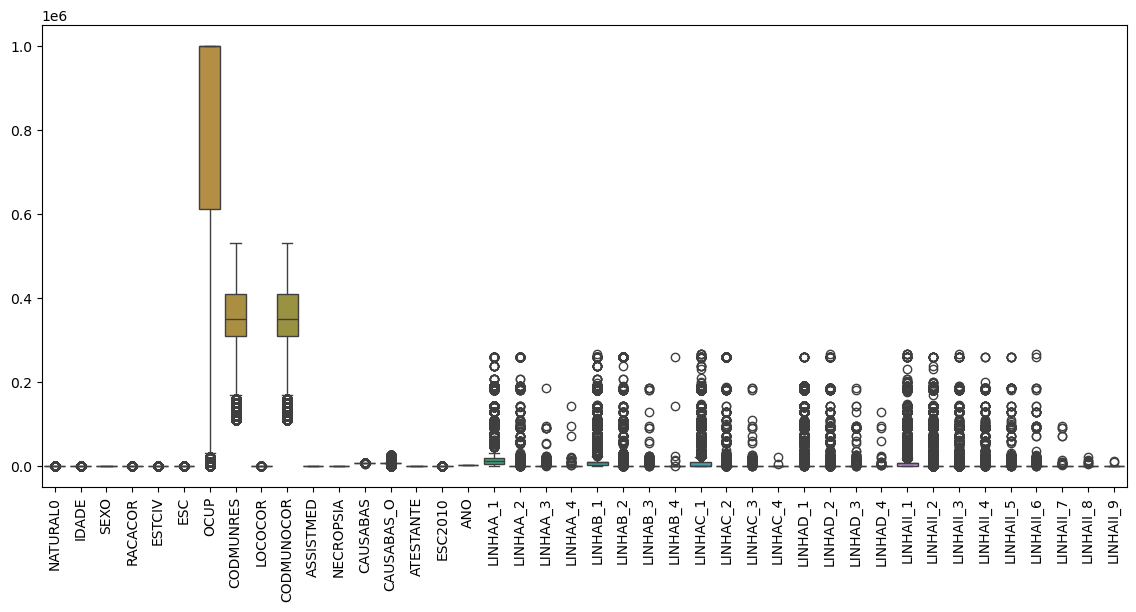

In [54]:
# Outliers

numeric_cols = df.select_dtypes(include=['number'])

plt.figure(figsize=(14, 6))
sns.boxplot(numeric_cols)
plt.xticks(rotation=90)
plt.show()

Como os registros são variados (diferentes idades, locais diferentes, ocupação diferente etc) os dados ficam mais dispersos ocasionando em outliers, mas é realidade do dado, e não um erro. Para futuras implementações, será necessário considerar essa característica dos dados e implementar algoritmos que sejam mais robustos a outliers

## Revertendo a Codificação atual de OCUP - Ocupação baseada no CBO 2002

A coluna de OCUP (ocupação) está codificada com os valores presentes no CBO 2002. Assim como feito em natural, irei realizar o merge com outra tabela que contém valor código CBO e Profissão.

In [58]:
df_ocup['Profissao'].nunique()

2415

É possível notar muitos valores distintos para profissão na tabela. Não é interessante trabalhar com algoritmos de aprendizado com dados tão granulados dessa forma. Pensando em uma solução, seria interessante agrupá-los.

Por não conseguir identificar padrões entre os grupos dessa forma, utilizaremos um algoritmo de clusterização (K-menas), que irá auxiliar na formação desses clusters de profissão.

In [60]:
df_ocup.head()

,Profissao,Codigo
0,Oficial General da Aeronáutica,10105
1,Oficial General do Exército,10110
2,Oficial General da Marinha,10115
3,Oficial da Aeronáutica,10205
4,Oficial do Exército,10210


# K-Means

Para generalizar as profissões e diminuir os campos de profissões únicas, aplicaremos o modelo de Kmeans para agrupar os grupos semelhantes entre si. As profissões estão classificadas de acordo com o código CBO 2002, aplamente descritivo.

In [63]:
# importando a biblioteca para executar o algoritmo

from sklearn.cluster import KMeans

In [64]:
# Normalizando os dados para garantir a contribuição igual dos atributos em um intervalo específico
# No caso do RobustScaler, reduz a influencia dos outliers ao escalar os dados. Aplicar a normalização antes do Kmeans - que é sensível à escala 
# dos dados e aos outliers

scaler = RobustScaler()
df_scaled = scaler.fit_transform(df_ocup.select_dtypes(include='number'))

In [65]:
df_scaled

array([[-0.99212753],
       [-0.99211769],
       [-0.99210785],
       ...,
       [ 0.95609132],
       [ 0.95413108],
       [-1.01201535]])

In [66]:
# Ajusta para o número correto de linhas
X = np.reshape(df_scaled, (-1,1))

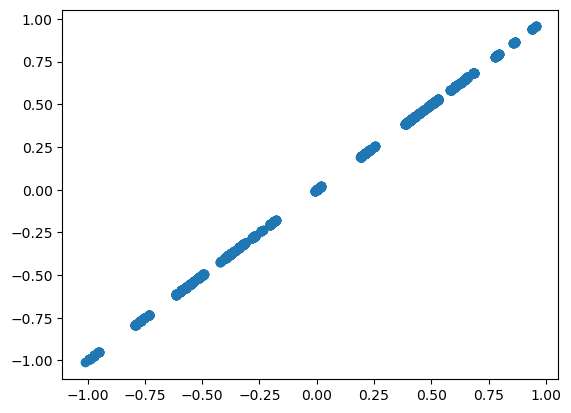

In [67]:
plt.scatter(X, X)

#### Coeficiente de Silhueta

Ele oferece uma análise de quão bem determinada instância foi agrupada, ou seja, o quão semelhante o elemento é comparado aos outros grupos.
- Quanto maior esse coeficiente, mais os clusters estão bem definidos no modelo

A fórmula do Coeficiente de Silhueta é:

$$
  s = \frac{b - a}{ \max (a, b)}
$$

Onde:
- **a** é a distância média entre um ponto e todos os outros pontos do mesmo grupo.
- **b** é a distância média entre o ponto e todos os pontos do cluster mais próximo.


- Avalia o quão bem os grupos estão separados - O ideal é maximizar o valor B (distância entre todos os pontos dos outros grupos) e minimizar o valor A (distância entre os pontos do mesmo grupo)

O Coeficiente de Silhueta pode ser usado para determinar a qualidade do agrupamento e para ajudar a escolher o melhor número de clusters (`k`) em K-Means.

Estrutura:
metrics.silhouette_score(X, labels_gerados, metric='euclidean') Distância euclidiana é padrão

In [69]:
# Verificando qual seria o melhor valor para K

valores_k = []
s = []

for i in range(2,15):
    kmeans_test = KMeans(n_clusters=i, random_state=0, n_init=10).fit(X)
    valores_k.append(i)
    print(i, metrics.silhouette_score(X, kmeans_test.labels_).round(2))
    s.append(metrics.silhouette_score(X, kmeans_test.labels_))

2 0.74
3 0.65
4 0.65
5 0.64
6 0.67
7 0.7
8 0.72
9 0.73
10 0.75
11 0.76
12 0.73
13 0.74
14 0.74


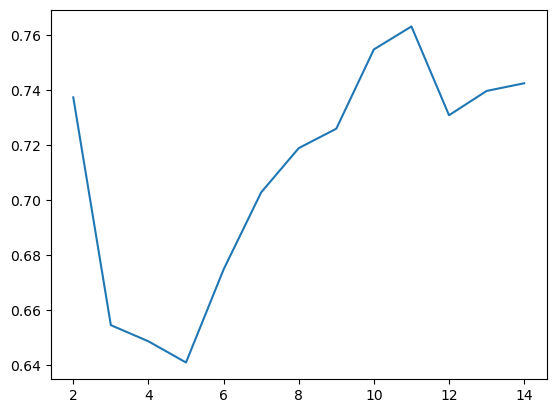

In [70]:
# Plotando o gráfico do Coeficiente de Silhueta

fig, ax = plt.subplots()
ax.plot(valores_k, s)
plt.show()

In [71]:
# Com o método silhueta, é possível notar que o ponto 11 está bem agrupado e bem separado dos outros clusters

kmeans = KMeans(n_clusters=11, random_state=0, n_init=10).fit(X)
metrics.silhouette_score(X, kmeans.labels_).round(2)

0.76

In [72]:
kmeans.labels_

array([9, 9, 9, ..., 0, 0, 9])

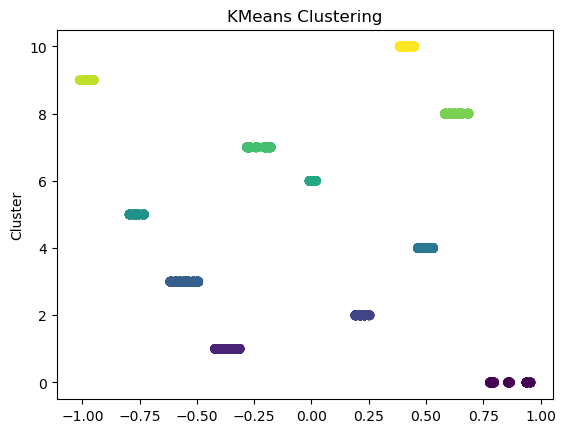

In [73]:
# Plotando o gráfico
fig, ax = plt.subplots()
ax.scatter(X, kmeans.labels_,c=kmeans.labels_)
plt.ylabel('Cluster')
plt.title('KMeans Clustering')
plt.show()

In [74]:
# Centróides de cada cluster (média)
print("Centróides dos clusters: ", (kmeans.cluster_centers_).round(2))

# Agrupando os dados com base nos rótulos
df_ocup['Cluster1'] = kmeans.labels_

# Número de profissões em cada cluster
print(df_ocup['Cluster1'].value_counts())

# Exibindo os dados por cluster
for i in range(11): 
    print(f"Cluster {i}:\n")
    print(df_ocup[df_ocup['Cluster1'] == i].head())
    print(df_ocup[df_ocup['Cluster1'] == i].tail())
    print("\n")

Centróides dos clusters:  [[ 0.84]
 [-0.37]
 [ 0.22]
 [-0.56]
 [ 0.5 ]
 [-0.76]
 [ 0.  ]
 [-0.23]
 [ 0.62]
 [-0.97]
 [ 0.41]]
Cluster1
3     557
4     305
10    284
1     278
8     249
2     186
7     176
6     142
5     128
0      95
9      29
Name: count, dtype: int64
Cluster 0:

                                              Profissao  Codigo  Cluster1
2333  Encarregado de manutenção mecânica de sistemas...  910105         0
2334     Supervisor de manutenção de aparelhos térmicos  910110         0
2335                 Supervisor de manutenção de bombas  910115         0
2336      Supervisor de manutenção de máquinas gráficas  910120         0
2337  Supervisor de manutenção de máquinas industria...  910125         0
                                            Profissao  Codigo  Cluster1
2423                                     Dona de Casa  999992         0
2424                           Aposentado/Pensionista  999993         0
2425  Desempregado cronico ou cuja habitação habitual  99

Cluster 1 - ANALISE - Um padrão que pude observar é que os 3 primeiros números do código CBO possui um padrão para uma classificação mais generalizada:

- Cluster 0: 910 - 992 - até 999 OK
- Cluster 1: 300 - 395 - Result: 300 - 354
- Cluster 2: 611 a 643 - OK
- Cluster 3: 201 a 263 - OK
- Cluster 4: 710 - 784 - Result: de 750 - 784
- Cluster 5: 111 - 142 - OK
- Cluster 6: 510 - 524 - OK
- Cluster 7: PARTE DO CLUSTER 1 (371 - 395) + 410 - 424
- Cluster 8: 810 - 862 - OK
- Cluster 9: 010 - 031 (0 - nao informada) - OK
- Cluster 10: RESTANTE DO Cluster 4DO Cluster 4

A partir dessa análise, foi possível perceber que os grupos foram bem agrupados entre si, porém houveram 2 grupos que foram misturados

### Reduzindo o n° de K - 9 Grupos

In [78]:
kmeans_2 = KMeans(n_clusters=9, random_state=0, n_init=10).fit(X)
metrics.silhouette_score(X, (kmeans_2.labels_).round(2))

0.7260040485733353

Obtivemos um valor de silueta menor, porém 9 grupos seria o suficiente para classificar as profissões

In [80]:
df_ocup['Cluster2'] = kmeans_2.labels_

# Visualizando o número de elementos em cada cluster
print(df_ocup['Cluster2'].value_counts())

# Exibindo os dados por cluster
for i in range(9): 
    print(f"Cluster {i}:\n")
    print(df_ocup[df_ocup['Cluster2'] == i].head())
    print(df_ocup[df_ocup['Cluster2'] == i].tail())

    print("\n")

Cluster2
1    589
5    557
2    278
4    249
3    186
8    176
0    157
6    142
7     95
Name: count, dtype: int64
Cluster 0:

                        Profissao  Codigo  Cluster1  Cluster2
0  Oficial General da Aeronáutica   10105         9         0
1     Oficial General do Exército   10110         9         0
2      Oficial General da Marinha   10115         9         0
3          Oficial da Aeronáutica   10205         9         0
4             Oficial do Exército   10210         9         0
                                              Profissao  Codigo  Cluster1  \
152    Gerente de segurança de tecnologia da informação  142525         5   
153   Gerente de suporte técnico de tecnologia da in...  142530         5   
154         Gerente de pesquisa e desenvolvimento (P&D)  142605         5   
155        Gerente de projetos e serviços de manutenção  142705         5   
2428                                      Nao informada       0         9   

      Cluster2  
152          0  
153

Cluster 2
 - Cluster 0: 010 - 142 - Result: mistura entre 2 grupos (010 - 031) (111 - 142)
 - Cluster 1: Divisão correta - 710 - 784 
 - Cluster 2: 300 - 395 - Result: Começou 300 - 354
 - Cluster 3: 611 a 643 - OK
 - Cluster 4: 810 - 862 - OK
 - Cluster 5: 201 a 263 - OK

 - Cluster 6: 510 - 524 - OK
 - Cluster 7: 910 - 999 - OK
 - Cluster 8: 371 - 424 - Mistura entre 2 grupos, assim como o cluster 1

Apesar de ainda ter 1 grupo misturado, obteve um resultado mais próximo do esperado

A partir desse resultado obtido, irei organizar o agrupamento correto entre os valores, para que assim possa trabalharar com esses valores também

In [84]:
Grupos = ['Militares', 'Poder Público e Gerentes', 'Profissionais de Ciências e Artes', 'Técnicos', 
          'Serviços Administrativos', 'Trabalhadores de vendas e comércios', 
          'Trabalhadores Agropecuários, florestais e da pesca', 'Trabalhadores de produção e serviços industriais extrativa',
          'Trabalhadores em Indústrias de processos contínuos', 'Trabalhadores de reparação e manutenção']

In [85]:
df_ocup['Cluster_Final'] = None


manutencao = (df_ocup['Cluster1'] == 0) & (df_ocup['Profissao'] != 'Ignorada')
tecnico = ((df_ocup['Cluster1'] == 1) | ((df_ocup['Cluster1'] == 7) & (df_ocup['Codigo'].isin(range(371, 395)))))
agropecuarios = (df_ocup['Cluster1'] == 2)
ciencias = (df_ocup['Cluster1'] == 3)
poder_publico = (df_ocup['Cluster1'] == 5)
comerciantes = (df_ocup['Cluster1'] == 6)
administrativos = (df_ocup['Cluster1'] == 7) & (~df_ocup['Codigo'].isin(range(371, 395)))
industria_continua = (df_ocup['Cluster1'] == 8)
militares = (df_ocup['Cluster1'] == 9) & (df_ocup['Profissao'] != 'Nao informada')
nao_informada = (df_ocup['Cluster1'] == 9) & (df_ocup['Codigo'] == 0)
ignorado = (df_ocup['Cluster1'] == 0) & (df_ocup['Profissao'] == 'Ignorada')
ind_extrativa = (df_ocup['Cluster2'] == 1)

In [86]:
df_ocup.loc[militares, 'Cluster_Final'] = 1
df_ocup.loc[poder_publico, 'Cluster_Final'] = 2
df_ocup.loc[ciencias, 'Cluster_Final'] = 3
df_ocup.loc[tecnico, 'Cluster_Final'] = 4
df_ocup.loc[administrativos, 'Cluster_Final'] = 5
df_ocup.loc[comerciantes, 'Cluster_Final'] = 6
df_ocup.loc[agropecuarios, 'Cluster_Final'] = 7
df_ocup.loc[ind_extrativa, 'Cluster_Final'] = 8
df_ocup.loc[industria_continua, 'Cluster_Final'] = 9
df_ocup.loc[manutencao, 'Cluster_Final'] = 10
df_ocup.loc[nao_informada, 'Cluster_Final'] = 11
df_ocup.loc[ignorado, 'Cluster_Final'] = 11

In [87]:
# Dessa forma, possuimos uma tabela generalizada de profissões, e apenas 11 elementos unicos

df_ocup = df_ocup.drop(['Cluster1', 'Cluster2'], axis=1)

df_ocup.head()

,Profissao,Codigo,Cluster_Final
0,Oficial General da Aeronáutica,10105,1
1,Oficial General do Exército,10110,1
2,Oficial General da Marinha,10115,1
3,Oficial da Aeronáutica,10205,1
4,Oficial do Exército,10210,1


In [88]:
# Realizando o merge com o dataset principal

colunas_ocup =  df_ocup[['Codigo','Cluster_Final']]

dframe_merged = pd.merge(df, colunas_ocup, how='inner', left_on='OCUP', right_on='Codigo')

df = dframe_merged.drop('Codigo', axis=1)

In [89]:
df = df.drop('OCUP', axis=1)

In [90]:
df.head()

,NATURAL0,IDADE,SEXO,RACACOR,ESTCIV,ESC,CODMUNRES,LOCOCOR,CODMUNOCOR,ASSISTMED,...,LINHAII_1,LINHAII_2,LINHAII_3,LINHAII_4,LINHAII_5,LINHAII_6,LINHAII_7,LINHAII_8,LINHAII_9,Cluster_Final
0,0,497,2,4,3,1,290840,3,290840,1,...,0,0,0,0,0,0,0,0,0,10
1,0,467,1,1,4,2,290840,3,290840,1,...,96424,0,0,0,0,0,0,0,0,10
2,0,473,1,1,2,3,230240,3,230240,1,...,0,0,0,0,0,0,0,0,0,7
3,0,483,1,1,2,1,210230,3,210230,9,...,0,0,0,0,0,0,0,0,0,11
4,0,492,2,1,3,0,210150,3,210150,9,...,0,0,0,0,0,0,0,0,0,11


In [91]:
df['Cluster_Final'] = df['Cluster_Final'].astype('Int64')

In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211593 entries, 0 to 211592
Data columns (total 47 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   NATURAL0       211593 non-null  Int64 
 1   IDADE          211593 non-null  Int64 
 2   SEXO           211593 non-null  Int64 
 3   RACACOR        211593 non-null  Int64 
 4   ESTCIV         211593 non-null  Int64 
 5   ESC            211593 non-null  Int64 
 6   CODMUNRES      211593 non-null  Int64 
 7   LOCOCOR        211593 non-null  Int64 
 8   CODMUNOCOR     211593 non-null  Int64 
 9   ASSISTMED      211593 non-null  Int64 
 10  NECROPSIA      211593 non-null  Int64 
 11  LINHAA         211593 non-null  object
 12  LINHAB         211593 non-null  object
 13  LINHAC         211593 non-null  object
 14  LINHAD         211593 non-null  object
 15  LINHAII        211593 non-null  object
 16  CAUSABAS       211593 non-null  Int64 
 17  CAUSABAS_O     211593 non-null  Int64 
 18  ATES

# 4. Aplicando Algoritmos

In [94]:
df_training = df[
    [
        'LINHAA_1', 'LINHAA_2', 'LINHAA_3', 'LINHAA_4', 'LINHAB_1', 'LINHAB_2', 'LINHAB_3', 'LINHAB_4',
        'LINHAC_1', 'LINHAC_2', 'LINHAC_3', 'LINHAC_4', 'LINHAD_1', 'LINHAD_2', 'LINHAD_3', 'LINHAD_4',
        'LINHAII_1', 'LINHAII_2', 'LINHAII_3', 'LINHAII_4', 'LINHAII_5', 'LINHAII_6', 'LINHAII_7', 'LINHAII_8', 'LINHAII_9',
        'CAUSABAS', 'CAUSABAS_O'
    ]
]

# Mapa Som

In [96]:
from minisom import MiniSom
from sklearn import datasets

In [97]:
df_training.head()

,LINHAA_1,LINHAA_2,LINHAA_3,LINHAA_4,LINHAB_1,LINHAB_2,LINHAB_3,LINHAB_4,LINHAC_1,LINHAC_2,...,LINHAII_2,LINHAII_3,LINHAII_4,LINHAII_5,LINHAII_6,LINHAII_7,LINHAII_8,LINHAII_9,CAUSABAS,CAUSABAS_O
0,7300,0,0,0,185424,0,0,0,0,0,...,0,0,0,0,0,0,0,0,7300,7300
1,7300,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,7300,7300
2,10969,0,0,0,54624,0,0,0,7300,0,...,0,0,0,0,0,0,0,0,7300,7300
3,7300,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,7300,7300
4,7300,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,7300,7300


In [98]:
df_training.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211593 entries, 0 to 211592
Data columns (total 27 columns):
 #   Column      Non-Null Count   Dtype
---  ------      --------------   -----
 0   LINHAA_1    211593 non-null  Int64
 1   LINHAA_2    211593 non-null  Int64
 2   LINHAA_3    211593 non-null  Int64
 3   LINHAA_4    211593 non-null  Int64
 4   LINHAB_1    211593 non-null  Int64
 5   LINHAB_2    211593 non-null  Int64
 6   LINHAB_3    211593 non-null  Int64
 7   LINHAB_4    211593 non-null  Int64
 8   LINHAC_1    211593 non-null  Int64
 9   LINHAC_2    211593 non-null  Int64
 10  LINHAC_3    211593 non-null  Int64
 11  LINHAC_4    211593 non-null  Int64
 12  LINHAD_1    211592 non-null  Int64
 13  LINHAD_2    211592 non-null  Int64
 14  LINHAD_3    211592 non-null  Int64
 15  LINHAD_4    211592 non-null  Int64
 16  LINHAII_1   211593 non-null  Int64
 17  LINHAII_2   211593 non-null  Int64
 18  LINHAII_3   211593 non-null  Int64
 19  LINHAII_4   211593 non-null  Int64
 20  LINH

In [99]:
df_training = df_training.fillna(0)

In [100]:
# Normalizar os dados com RobustScaler - Baseado em percentis ao invés de média e desvio padrão - Mais robusto com os outliers

df_normalized = RobustScaler().fit_transform(df_training)

In [101]:
df_normalized

array([[-2.72260656e-01,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00, -9.00000000e+00, -9.00000000e+00],
       [-2.72260656e-01,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00, -9.00000000e+00, -9.00000000e+00],
       [ 6.69493417e-04,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00, -9.00000000e+00, -9.00000000e+00],
       ...,
       [ 1.29780555e+01,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-8.15294205e-01,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-7.10927620e-01,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00]])

In [102]:
# Definindo a grade SOM - Dimensões X e Y & o número de variáveis de entrada (numero de linhas de dados)
som_x = 6
som_y = 6

In [103]:
# Criar o SOM - Manhattan

som = MiniSom(x=som_x, y=som_y, input_len=df_normalized.shape[1], sigma=1.0, learning_rate=0.5, activation_distance='manhattan')

In [104]:
# Inicialização aleatória - Pesos extraídos aleatoriamente

som.train_random(df_normalized, num_iteration=5000, verbose=True)

 [ 5000 / 5000 ] 100% - 0:00:00 left 
 quantization error: 4326.918267075357


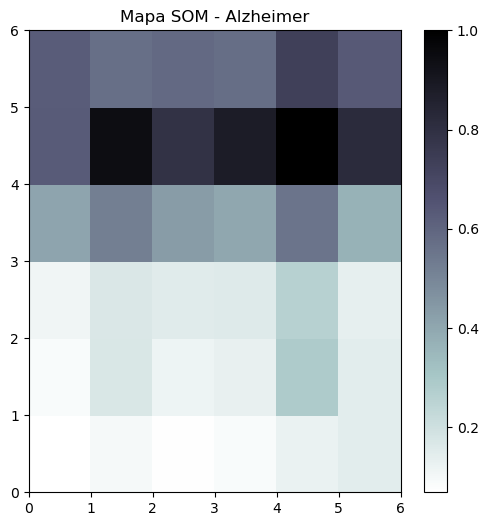

In [105]:
# Distância entre neurônios (U-Matrix)

plt.figure(figsize=(6, 6))
plt.pcolor(som.distance_map().T, cmap='bone_r')  # mapa de distância (U-Matrix)
plt.colorbar()
plt.title("Mapa SOM - Alzheimer")
plt.show()

SOM 2x2 - Erro de quantização: 12338.236577898353


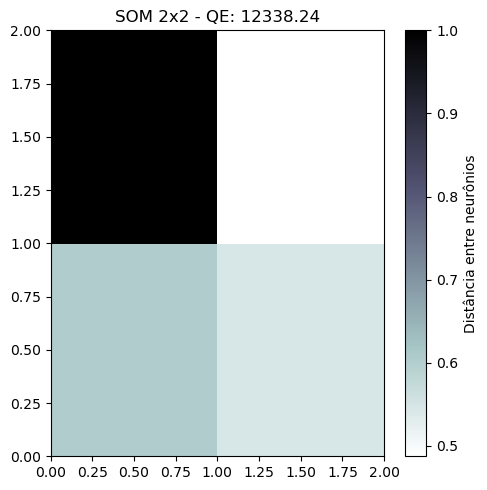

SOM 3x3 - Erro de quantização: 7745.670759878833


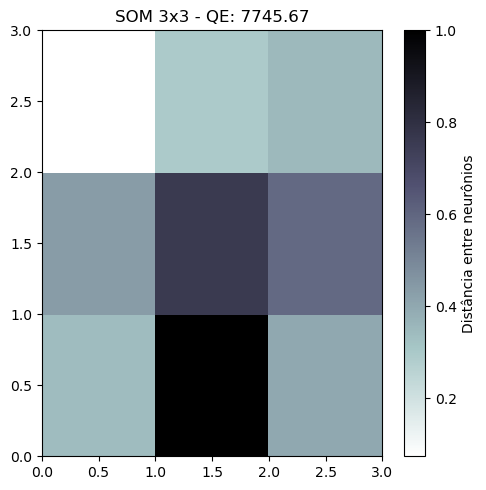

SOM 4x4 - Erro de quantização: 5495.444805839151


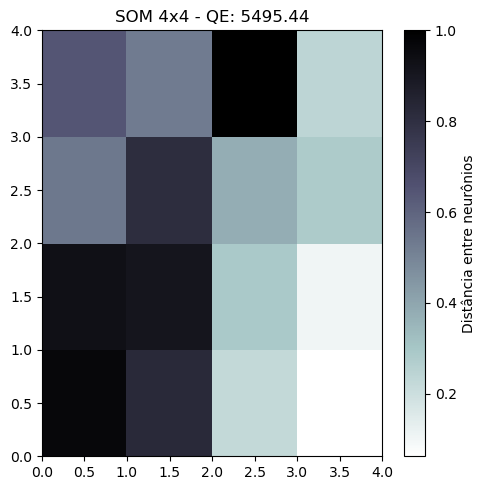

SOM 5x5 - Erro de quantização: 6175.947944669625


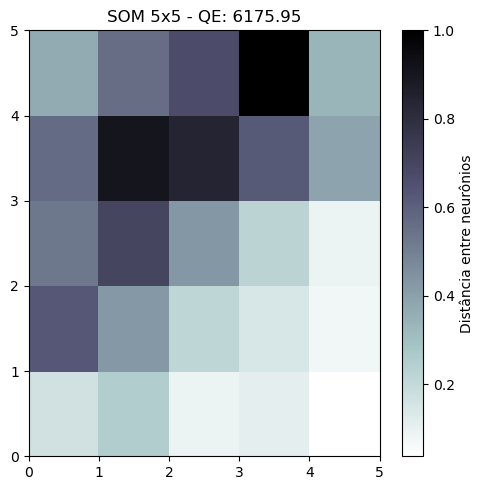

SOM 6x6 - Erro de quantização: 4442.000112300769


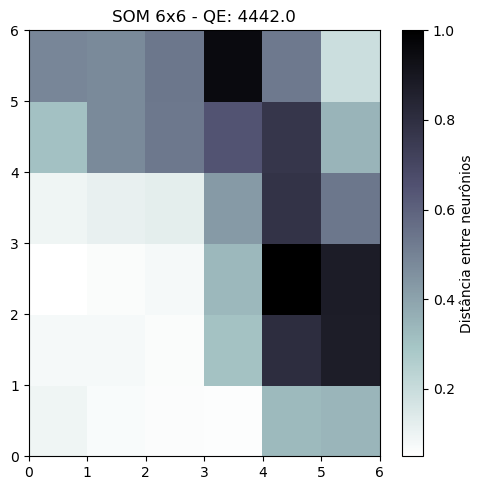

SOM 7x7 - Erro de quantização: 4399.434301911605


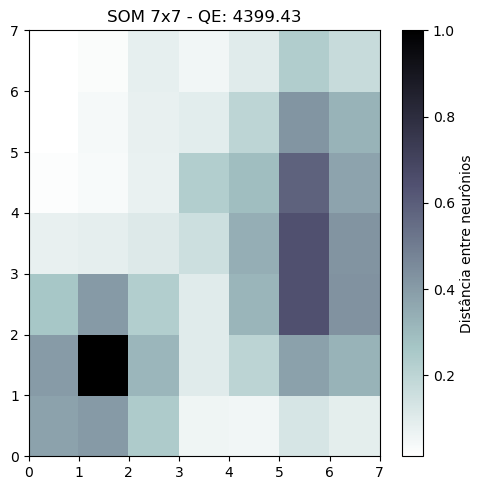

SOM 8x8 - Erro de quantização: 3782.060386484858


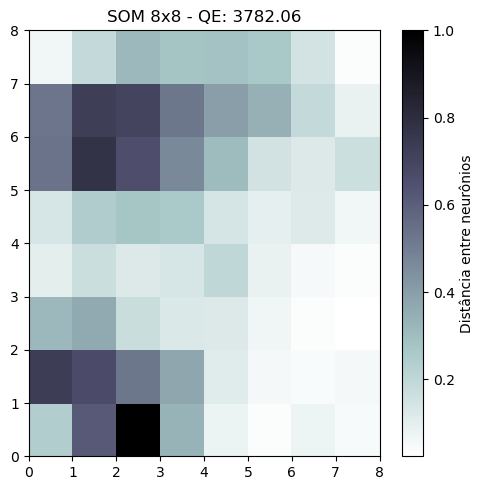

SOM 9x9 - Erro de quantização: 3355.1518225391287


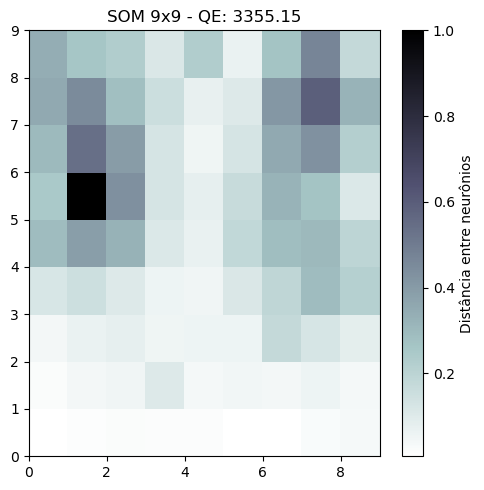

SOM 10x10 - Erro de quantização: 3360.548543542619


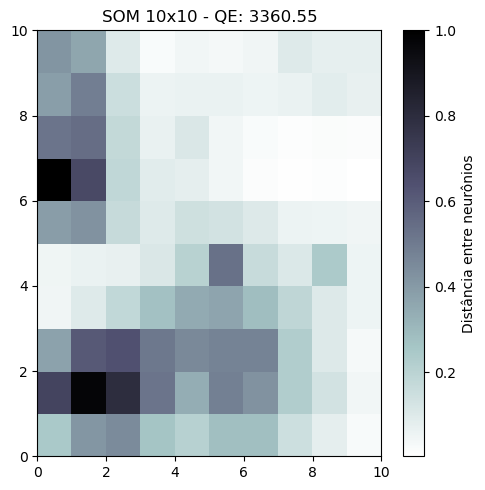

SOM 11x11 - Erro de quantização: 3159.5070503870866


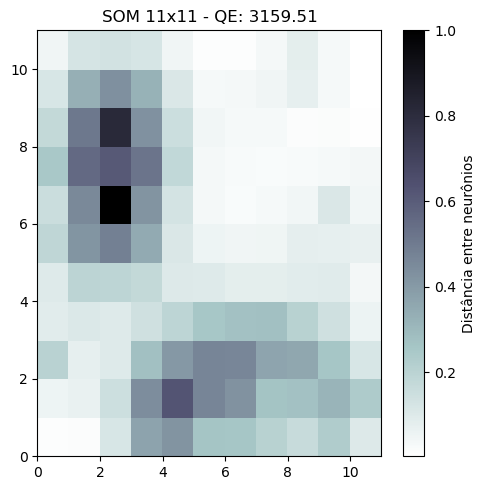

SOM 12x12 - Erro de quantização: 3223.7190171791726


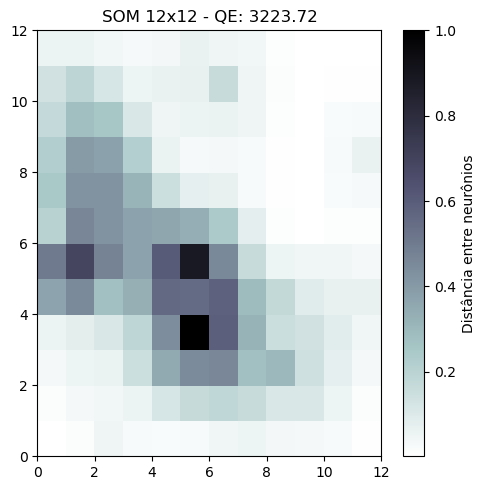

SOM 13x13 - Erro de quantização: 2986.214328082246


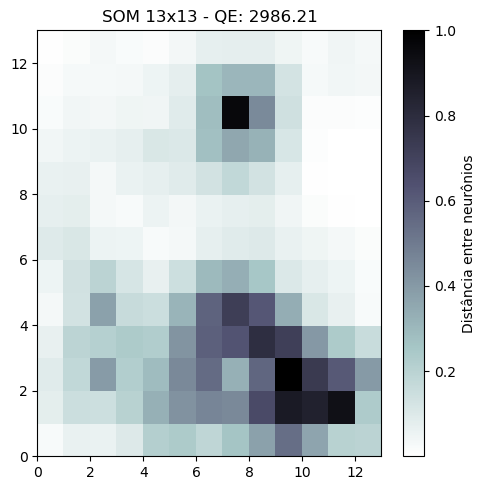

SOM 14x14 - Erro de quantização: 3002.971815586536


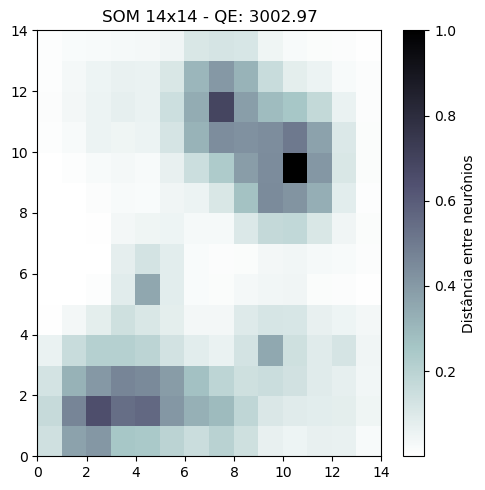

In [106]:
# Testando com diferentes grades

erro = []
sizes = []

for i in range(2, 15):
    som = MiniSom(i, i, input_len=df_normalized.shape[1], sigma=1.0, learning_rate=0.5, activation_distance='manhattan')
    som.train_random(df_normalized, 5000)
    qe = som.quantization_error(df_normalized)
    erro.append(qe)
    sizes.append(i)
    print(f"SOM {i}x{i} - Erro de quantização: {qe}")

    plt.figure(figsize=(5, 5))
    plt.title(f"SOM {i}x{i} - QE: {round(qe, 2)}")
    plt.pcolor(som.distance_map().T, cmap='bone_r') 
    plt.colorbar(label='Distância entre neurônios')
    plt.tight_layout()
    plt.show()

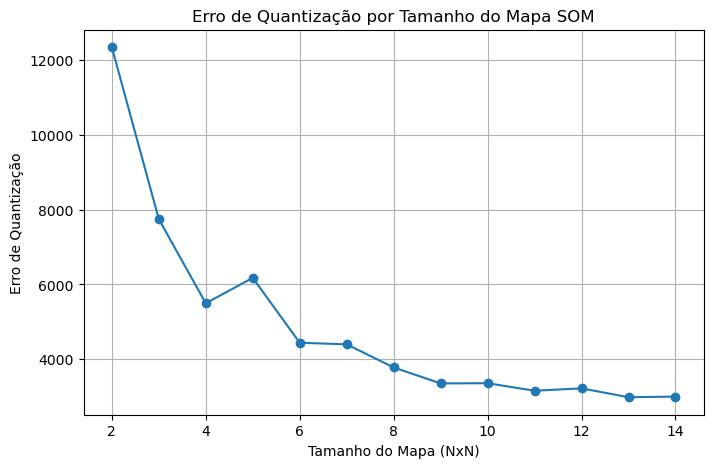

In [107]:
# Plotando o gráfico do erro de quantização

plt.figure(figsize=(8, 5))
plt.plot(sizes, erro, marker='o')
plt.title("Erro de Quantização por Tamanho do Mapa SOM")
plt.xlabel("Tamanho do Mapa (NxN)")
plt.ylabel("Erro de Quantização")
plt.grid(True)
plt.show()

In [108]:
# Testando com o MinMaxScaler

df_normalized_min = MinMaxScaler().fit_transform(df_training)

In [109]:
# Criar o SOM - Manhattan

som = MiniSom(x=som_x, y=som_y, input_len=df_normalized_min.shape[1], sigma=1.0, learning_rate=0.5, activation_distance='manhattan')

In [110]:
# Inicialização aleatória - Pesos extraídos aleatoriamente

som.train_random(df_normalized_min, num_iteration=5000, verbose=True)

 [ 5000 / 5000 ] 100% - 0:00:00 left 
 quantization error: 0.08401272962815166


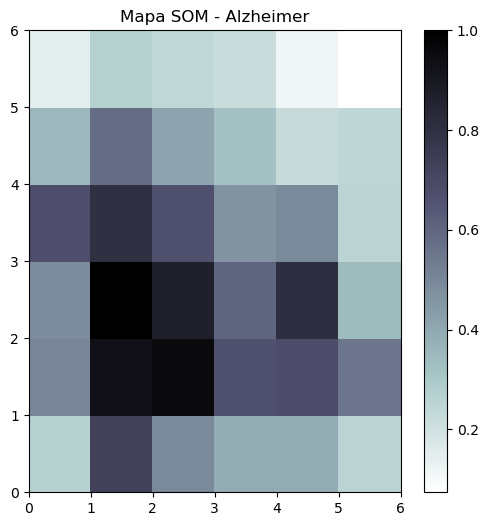

In [111]:
# Distância entre neurônios (U-Matrix)

plt.figure(figsize=(6, 6))
plt.pcolor(som.distance_map().T, cmap='bone_r')  # mapa de distância (U-Matrix)
plt.colorbar()
plt.title("Mapa SOM - Alzheimer")
plt.show()

Análise:

O Desempenho com o MinMaxScaler foi melhor. Acredito que seja por conta da escala que ele deixa os numeros

SOM 2x2 - Erro de quantização: 17403.952578049564


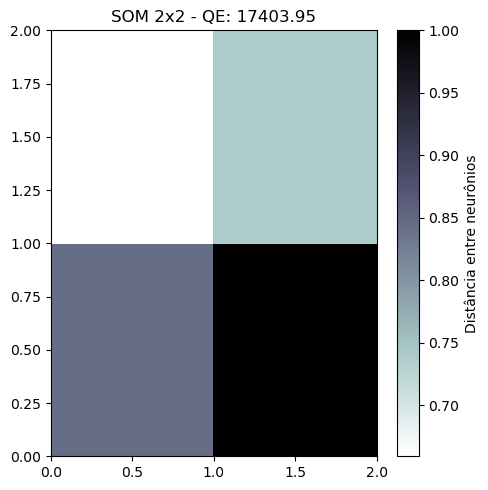

SOM 3x3 - Erro de quantização: 17403.806954725773


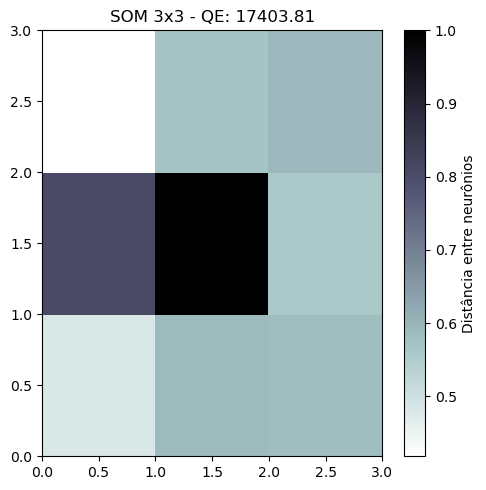

SOM 4x4 - Erro de quantização: 17403.74875847848


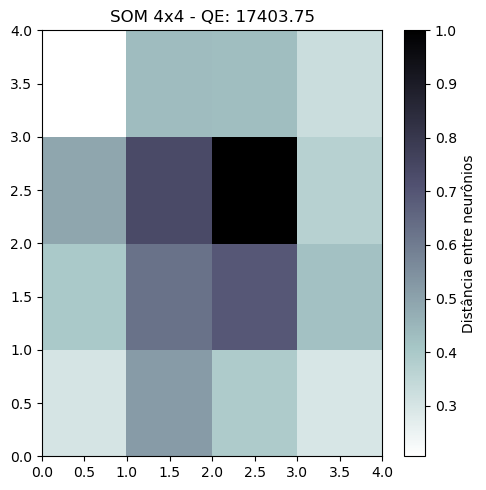

SOM 5x5 - Erro de quantização: 17403.733465782287


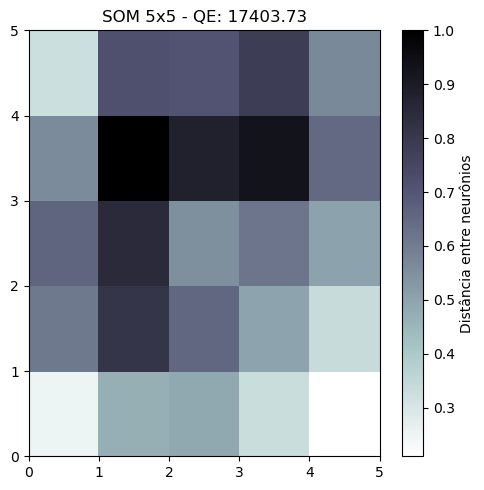

SOM 6x6 - Erro de quantização: 17403.70328591575


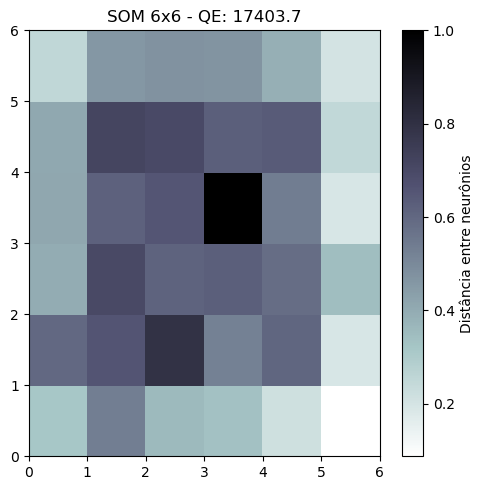

SOM 7x7 - Erro de quantização: 17403.595865191237


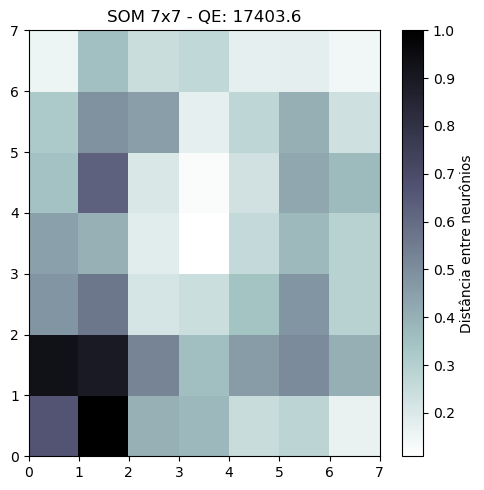

SOM 8x8 - Erro de quantização: 17403.579672365962


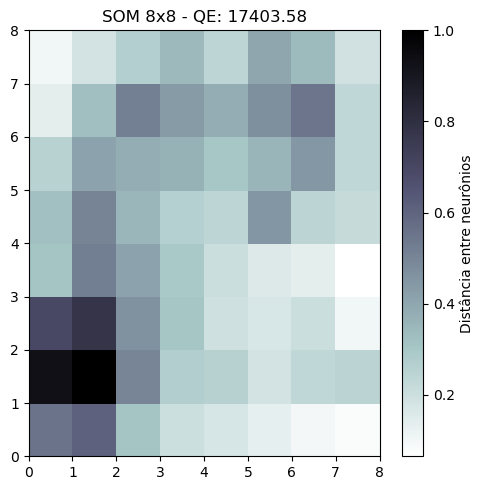

SOM 9x9 - Erro de quantização: 17403.592248417088


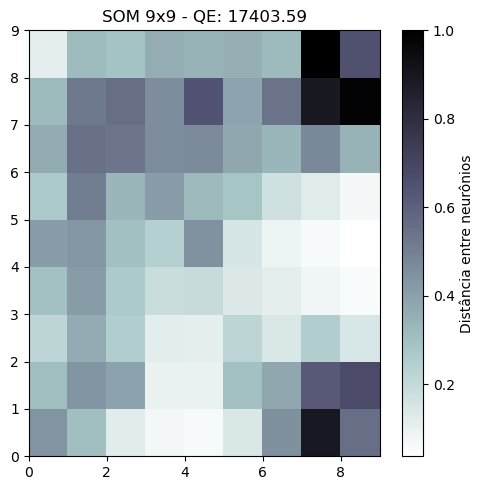

SOM 10x10 - Erro de quantização: 17403.55135802522


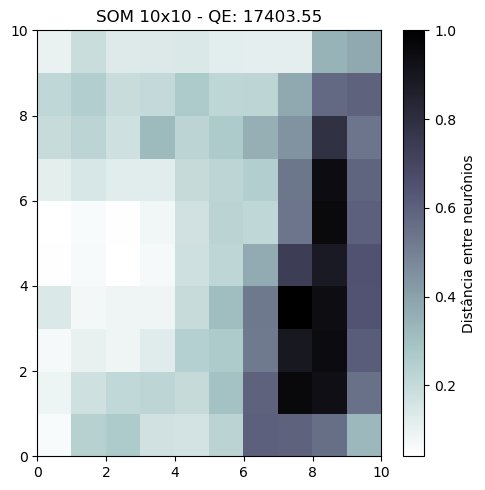

SOM 11x11 - Erro de quantização: 17403.568675793507


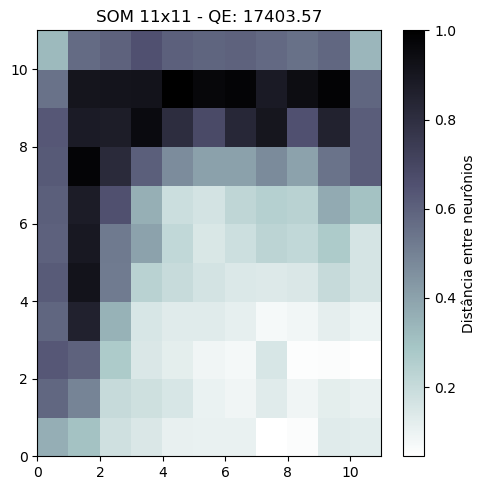

SOM 12x12 - Erro de quantização: 17403.55951906326


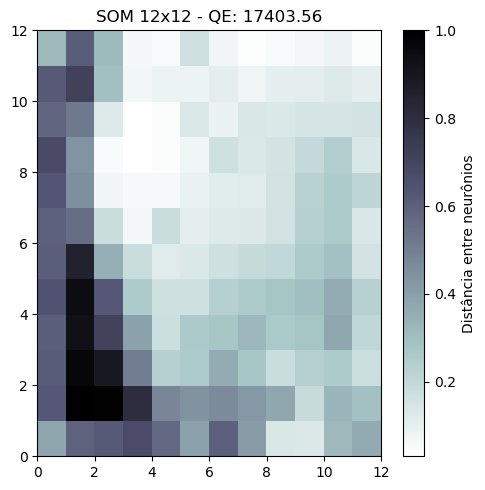

In [ ]:
# Testando com diferentes grades

erro = []
sizes = []

for i in range(2, 15):
    som = MiniSom(i, i, input_len=df_normalized_min.shape[1], sigma=1.0, learning_rate=0.5, activation_distance='manhattan')
    som.train_random(df_normalized_min, 5000)
    qe = som.quantization_error(df_normalized)
    erro.append(qe)
    sizes.append(i)
    print(f"SOM {i}x{i} - Erro de quantização: {qe}")

    plt.figure(figsize=(5, 5))
    plt.title(f"SOM {i}x{i} - QE: {round(qe, 2)}")
    plt.pcolor(som.distance_map().T, cmap='bone_r') 
    plt.colorbar(label='Distância entre neurônios')
    plt.tight_layout()
    plt.show()

In [112]:
# Criar o SOM - Cosseno

som_cos = MiniSom(x=som_x, y=som_y, input_len=df_normalized.shape[1], sigma=1.0, learning_rate=0.5, activation_distance='cosine')

In [113]:
# Inicialização aleatória - Pesos extraídos aleatoriamente

som_cos.train_random(df_normalized, num_iteration=5000, verbose=True)

 [ 5000 / 5000 ] 100% - 0:00:00 left 
 quantization error: 10228.7207158451


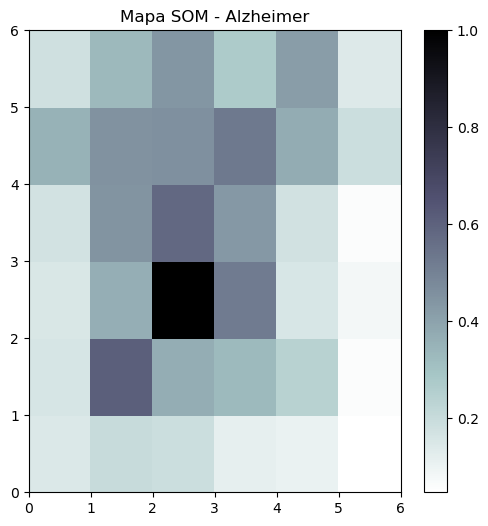

In [114]:
# Distância entre neurônios (U-Matrix)

plt.figure(figsize=(6, 6))
plt.pcolor(som_cos.distance_map().T, cmap='bone_r')  # mapa de distância (U-Matrix)
plt.colorbar()
plt.title("Mapa SOM - Alzheimer")
plt.show()

SOM 2x2 - Erro de quantização: 16395.5498283456


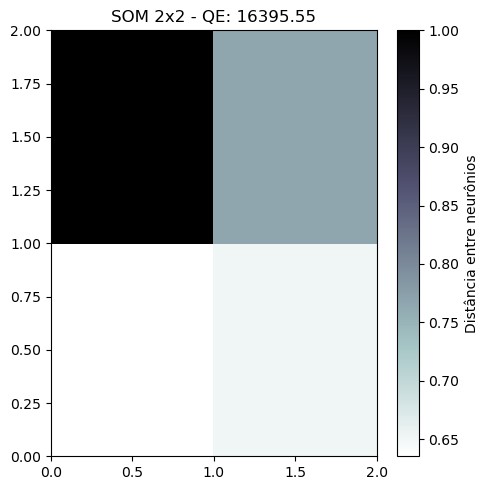

SOM 3x3 - Erro de quantização: 15626.576803304995


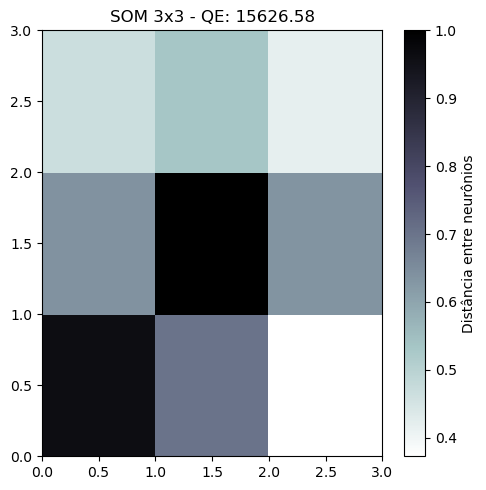

SOM 4x4 - Erro de quantização: 13618.71445969752


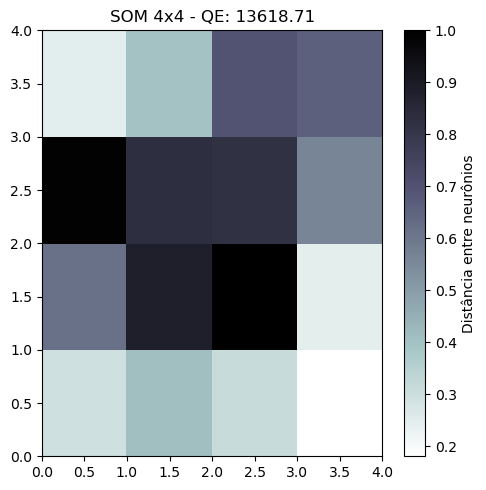

SOM 5x5 - Erro de quantização: 9080.444477588615


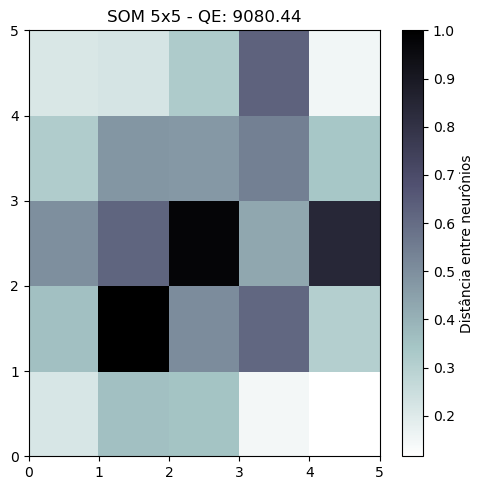

SOM 6x6 - Erro de quantização: 7795.318488243239


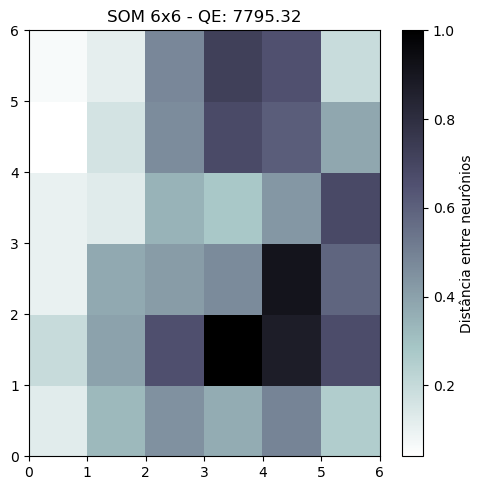

SOM 7x7 - Erro de quantização: 6935.103110197676


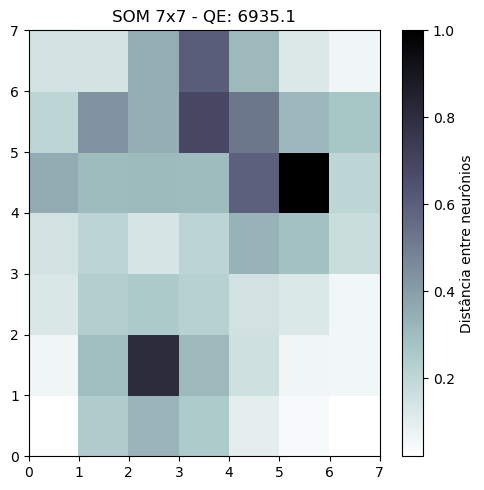

SOM 8x8 - Erro de quantização: 6773.387153811198


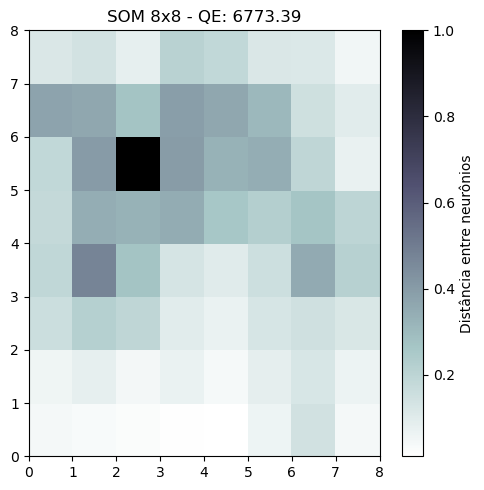

SOM 9x9 - Erro de quantização: 6456.790574375533


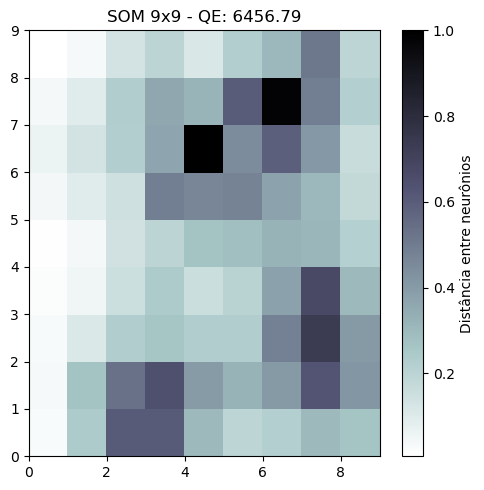

SOM 10x10 - Erro de quantização: 6596.035991376158


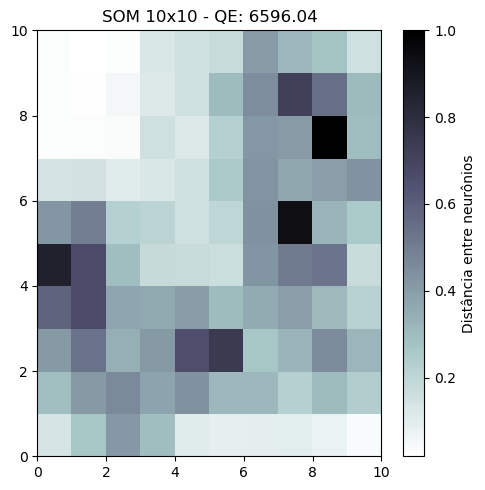

SOM 11x11 - Erro de quantização: 5333.130475840704


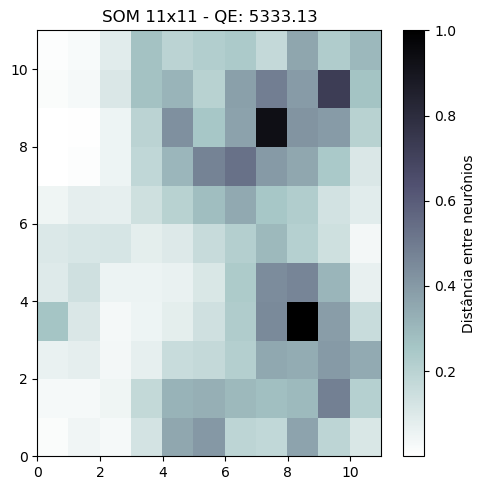

SOM 12x12 - Erro de quantização: 4803.451976014276


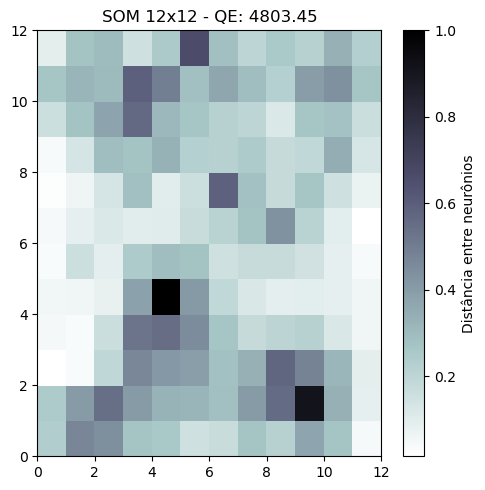

SOM 13x13 - Erro de quantização: 4993.179072036386


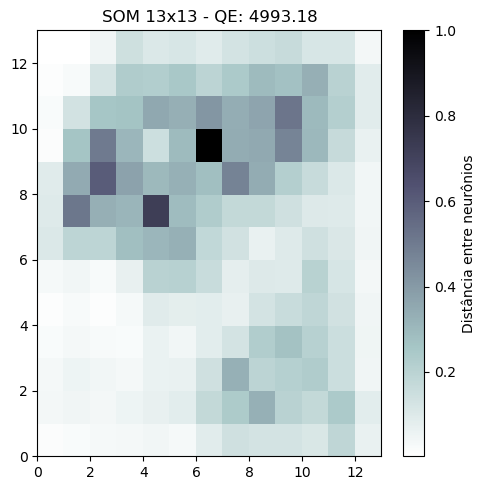

SOM 14x14 - Erro de quantização: 4858.95587093319


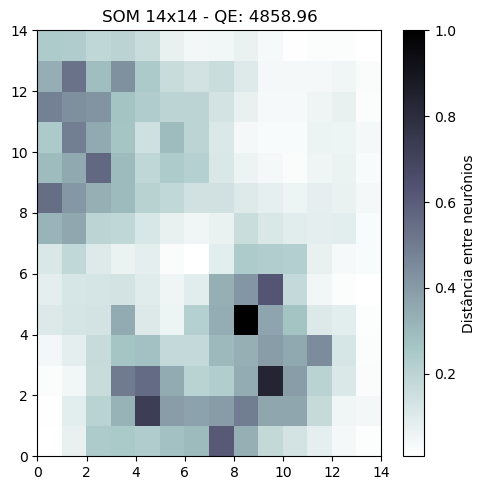

In [115]:
# Testando com diferentes grades

erro = []
sizes = []

for i in range(2, 15):
    som_cos = MiniSom(i, i, input_len=df_normalized.shape[1], sigma=1.0, learning_rate=0.5, activation_distance='cosine')
    som_cos.train_random(df_normalized, 5000)
    qe = som_cos.quantization_error(df_normalized)
    erro.append(qe)
    sizes.append(i)
    print(f"SOM {i}x{i} - Erro de quantização: {qe}")

    plt.figure(figsize=(5, 5))
    plt.title(f"SOM {i}x{i} - QE: {round(qe, 2)}")
    plt.pcolor(som_cos.distance_map().T, cmap='bone_r') 
    plt.colorbar(label='Distância entre neurônios')
    plt.tight_layout()
    plt.show()